In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("global_food_wastage_dataset.csv")
df.dropna()
df.head()

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06


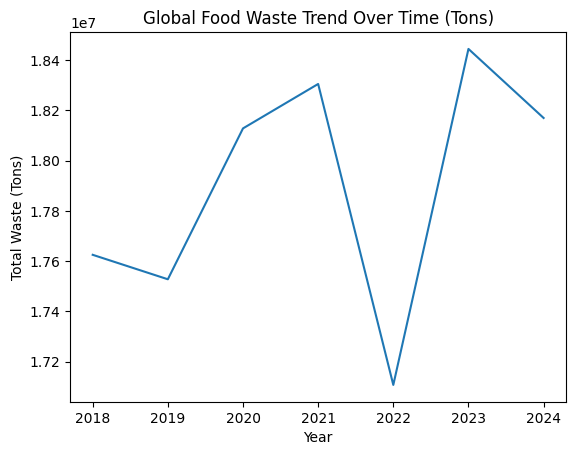

In [10]:
#TREND OF YEARLY OR ANNAUALLY FOOD WASTAGE

yearly_waste = df.groupby("Year")["Total Waste (Tons)"].sum()

plt.figure()
plt.plot(yearly_waste.index, yearly_waste.values)
plt.xlabel("Year")
plt.ylabel("Total Waste (Tons)")
plt.title("Global Food Waste Trend Over Time (Tons)")
plt.show()

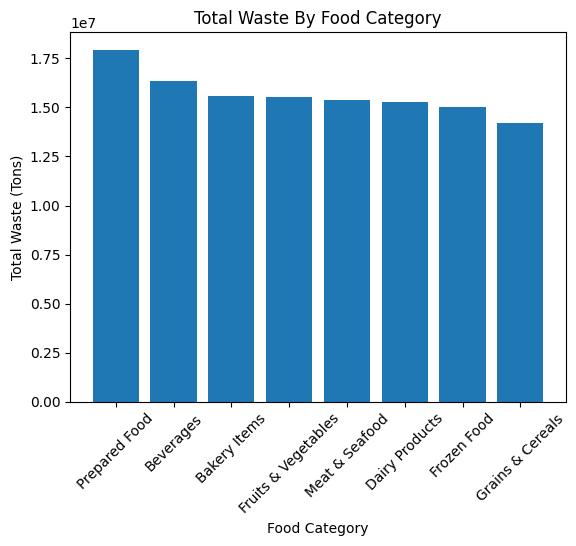

In [12]:
# TREND OF FOOD WASTAGE ACCORDING TO FOOD CATEGORY 

category_waste = (df.groupby("Food Category")["Total Waste (Tons)"].sum().sort_values(ascending = False))

plt.figure()
plt.bar(category_waste.index , category_waste.values)
plt.xticks(rotation=45)
plt.xlabel("Food Category")
plt.ylabel("Total Waste (Tons)")
plt.title("Total Waste By Food Category")
plt.show()

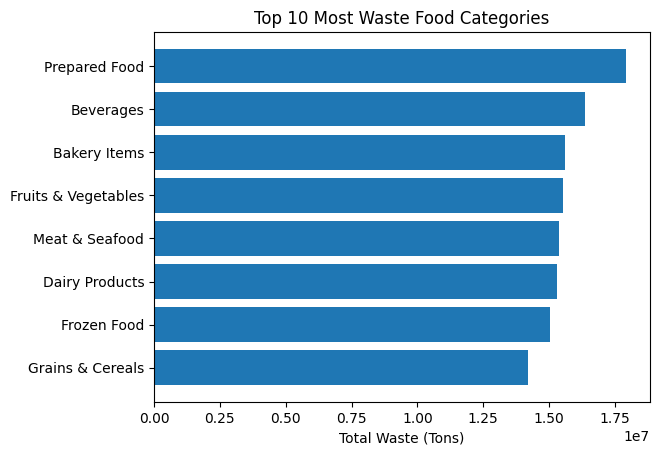

In [21]:
#Top 10 High-Waste Food Categories

top_categories = category_waste.head(10)

plt.figure()
plt.barh(top_categories.index, top_categories.values)
plt.xlabel("Total Waste (Tons)")
plt.title("Top 10 Most Waste Food Categories")
plt.gca().invert_yaxis()
plt.show()

In [18]:
# Monthly Waste Report

df["monthly_waste_estimate"] = df["Total Waste (Tons)"] / 12

monthly_report = (
    df.groupby(["Year", "Food Category"])["monthly_waste_estimate"]
    .sum()
    .reset_index()
)

print(monthly_report.head())


   Year        Food Category  monthly_waste_estimate
0  2018         Bakery Items           201230.447500
1  2018            Beverages           222868.970000
2  2018       Dairy Products           173694.315833
3  2018          Frozen Food           176552.637500
4  2018  Fruits & Vegetables           149595.140833


In [23]:
df.to_csv("cleaned_global_food_wastage_dataseta.csv", index=False)
print("✅Cleaned Dataset")

✅Cleaned Dataset
